In [50]:
import numpy as np
import pandas as pd
import string
import xgboost as xgb
import io
import nltk
import matplotlib
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')
stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')

from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
pd.set_option('mode.chained_assignment', None)

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mausa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mausa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mausa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mausa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
tweets = pd.read_csv("train.csv", usecols=['id','text', 'target'])
test = pd.read_csv("test.csv", usecols=['id','text'])

In [3]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7434 non-null   int64 
 1   text    7434 non-null   object
 2   target  7434 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 232.3+ KB


In [4]:
train_complete = pd.read_csv('train_complete.csv')
test_complete = pd.read_csv('test_complete.csv')

In [7]:
train_complete.columns.to_list()

['Unnamed: 0',
 'text',
 'text_without_stopwords',
 'processed_text',
 'target',
 'id',
 'length',
 'avg_word_length',
 'amount_of_words',
 'amount_of_unique_words',
 'sentiment',
 'stopwords_count',
 'punctuation_count',
 'mentions_count',
 'hashtags_count',
 'longest_word_length_without_stopwords',
 'stopword_word_ratio',
 'adjectives_count',
 'nouns_count',
 'verbs_count',
 'adverbs_count',
 'k0',
 'k1',
 'k2',
 'k3',
 'k4',
 'k5',
 'k6',
 'k7',
 'k8',
 'k9',
 'k10',
 'k11',
 'k12',
 'k13',
 'k14',
 'k15',
 'k16',
 'k17',
 'k18',
 'k19',
 'k20',
 'k21',
 'k22',
 'k23',
 'k24',
 'k25',
 'k26',
 'k27',
 'k28',
 'k29',
 'k30',
 'k31',
 'k32',
 'k33',
 'k34',
 'k35',
 'k36',
 'k37',
 'k38',
 'k39',
 'k40',
 'k41',
 'k42',
 'k43',
 'k44',
 'k45',
 'k46',
 'k47',
 'k48',
 'k49',
 'k50',
 'k51',
 'k52',
 'k53',
 'k54',
 'k55',
 'k56',
 'k57',
 'k58',
 'k59',
 'k60',
 'k61',
 'k62',
 'k63',
 'k64',
 'k65',
 'k66',
 'k67',
 'k68',
 'k69',
 'k70',
 'k71',
 'k72',
 'k73',
 'k74',
 'k75',
 'k76

## Feature importance.

### FI: Features de texto.

[]

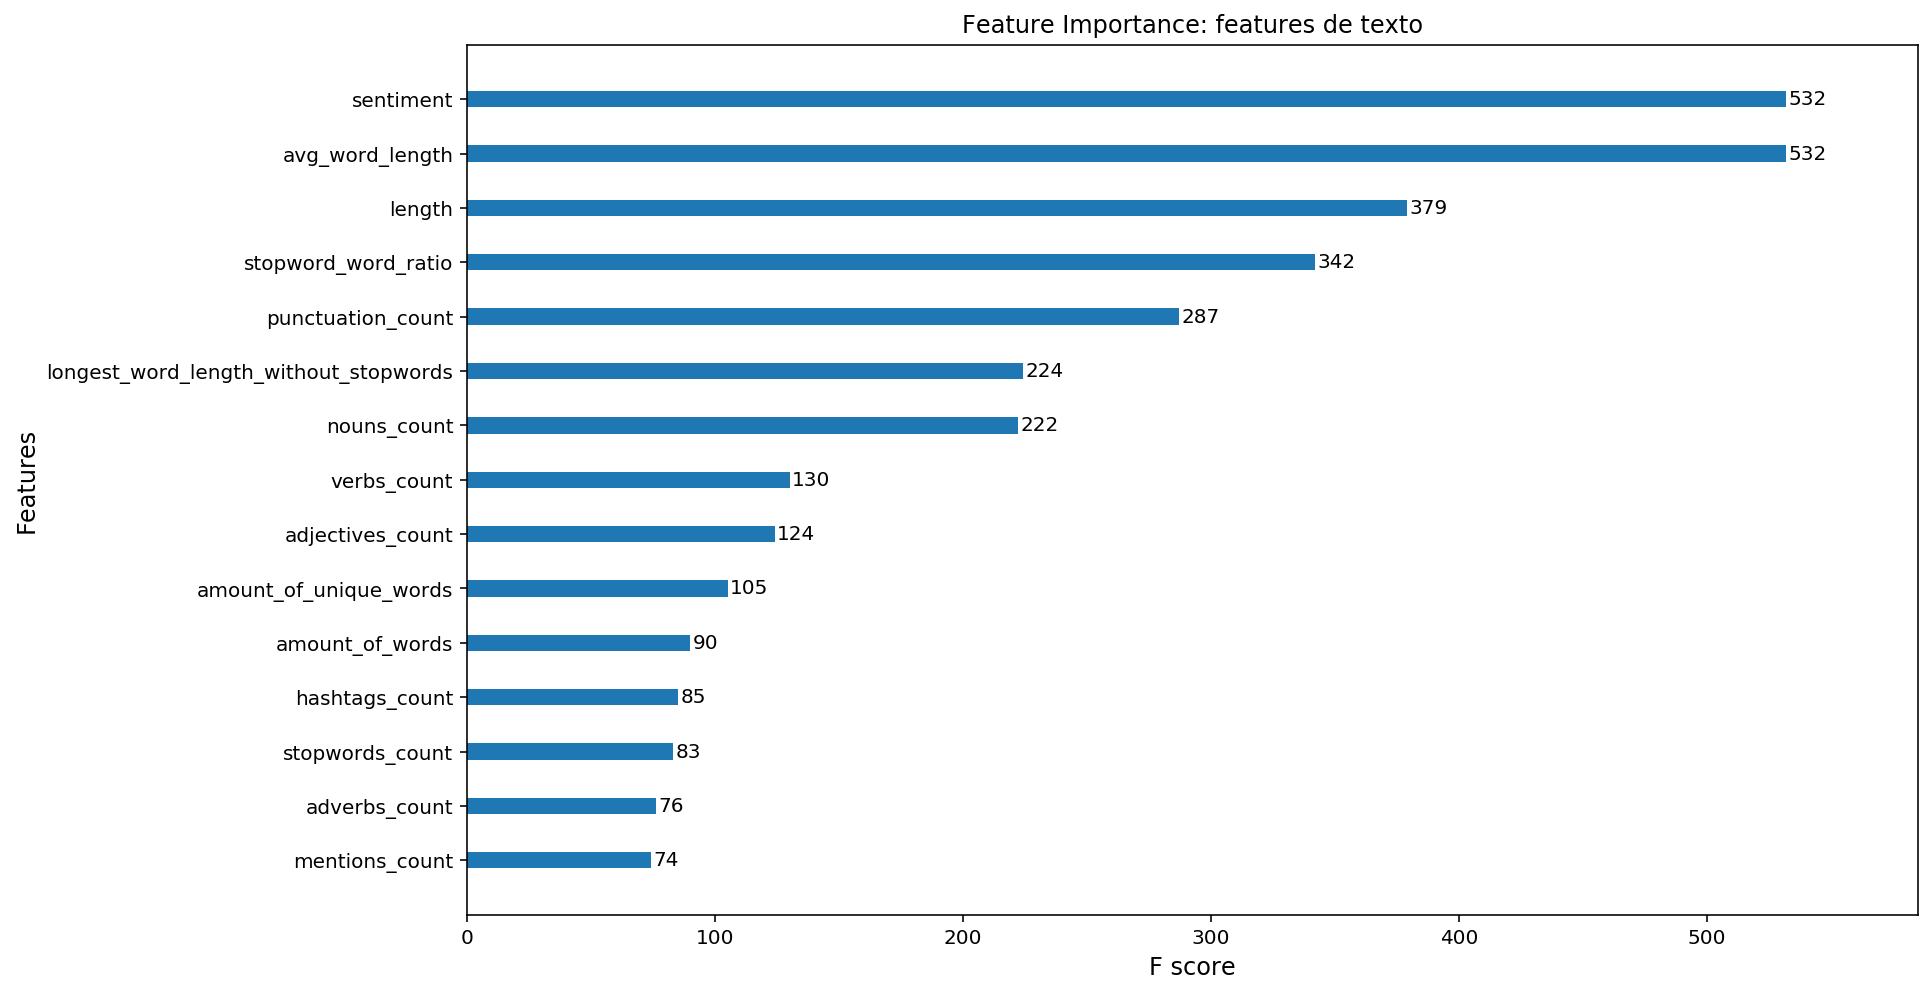

In [97]:
#Feature Importance de features de texto
x = train_complete.loc[:,'length':'adverbs_count']
y = train_complete['target']
model = XGBClassifier()
model.fit(x, y)

pyplot.rcParams['figure.figsize'] = [13, 8]
#plt.rcParams['axes.labelsize'] = 'large'
#plt.rcParams['axes.titlesize'] = 'large'

plt = plot_importance(model, grid = False,  height = 0.3)

plt.set_title('Feature Importance: features de texto')
plt.plot()

In [62]:
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=new_colors) 


In [ ]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = most_frequent_fake,x = 'fake',y='word')
grafico.set_title('Top 50 palabras usadas en tweets falsos\n',fontsize = 25)
grafico.set_xlabel('Cantidad de apariciones',fontsize = 20)
grafico.set_ylabel('Palabra',fontsize = 20)
grafico.plot()

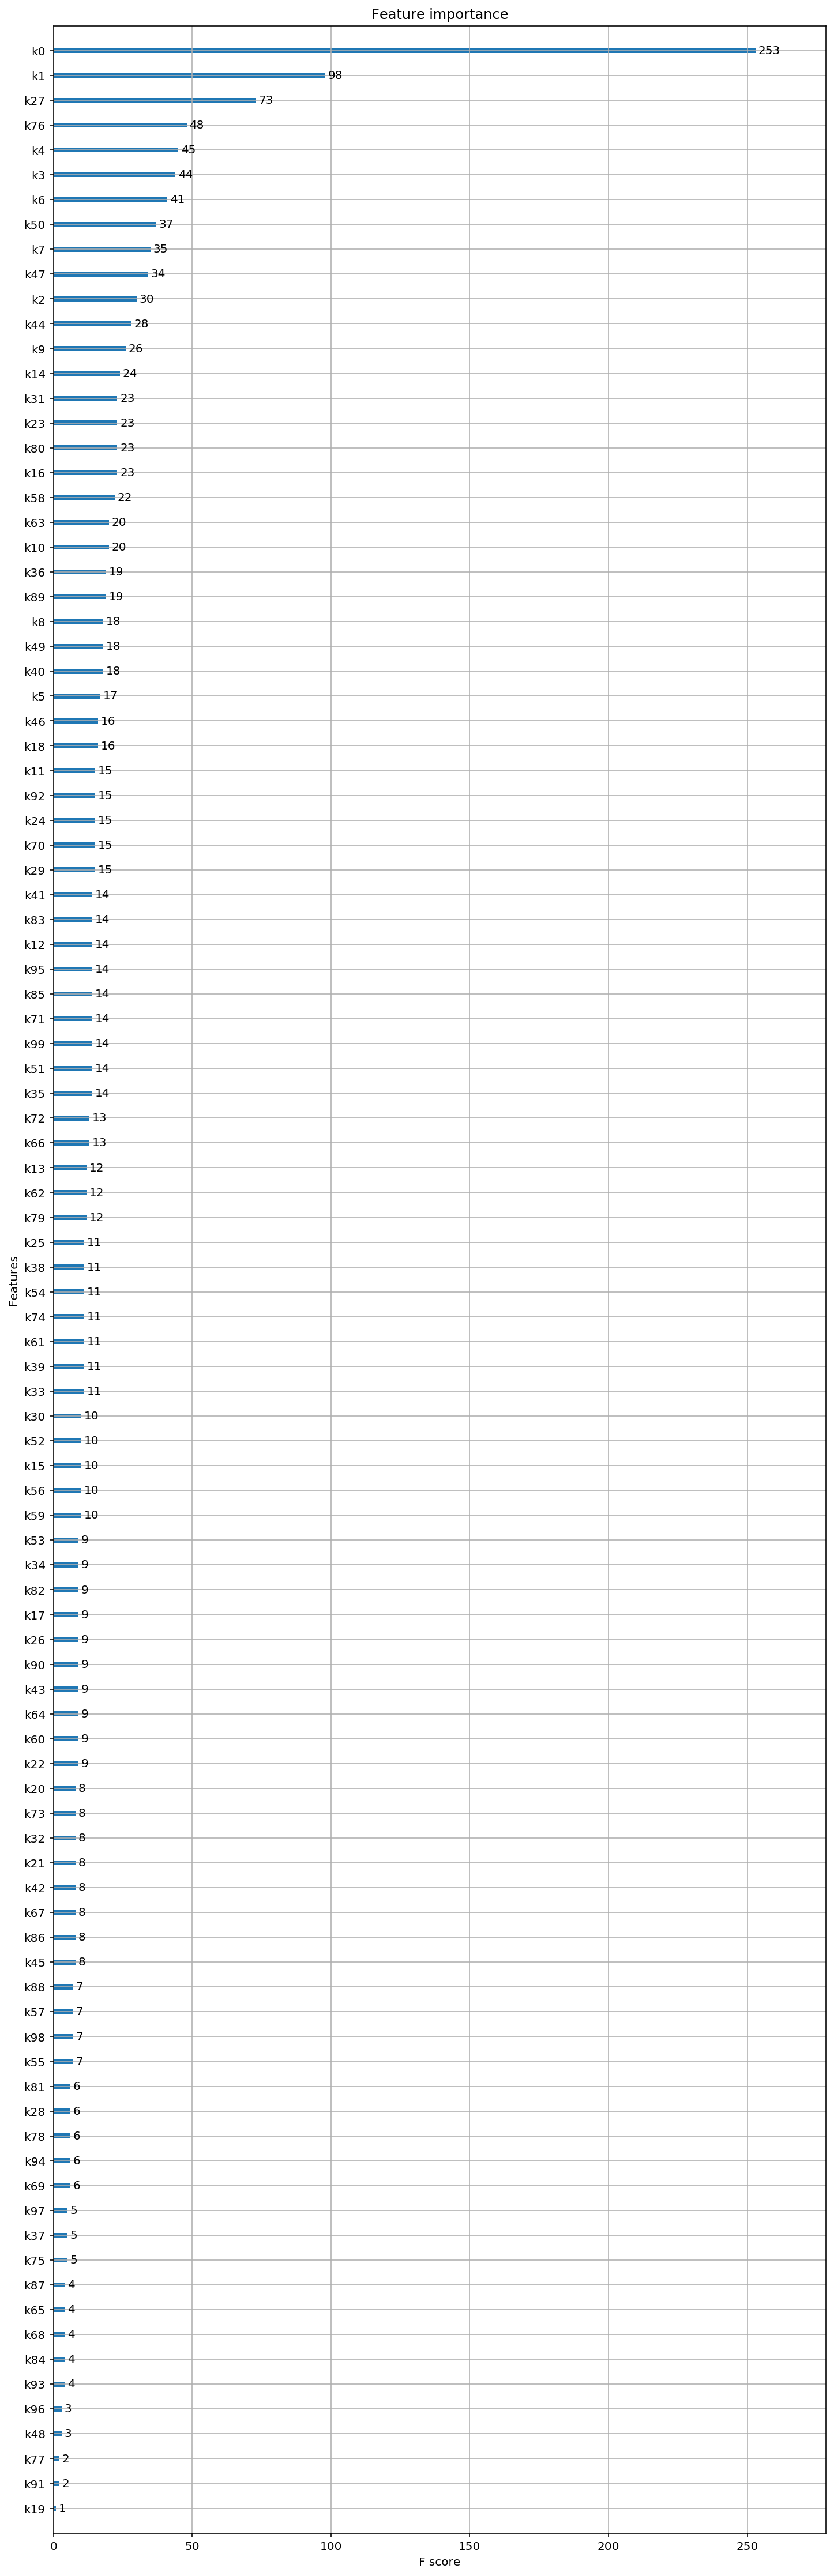

In [43]:
#Feature Importance de keywords
x = keyword_features.loc[:,'k0':]
y = train_w_features['target']
model = XGBClassifier()
model.fit(x, y)
pyplot.rcParams['figure.figsize'] = [12, 40]
plot_importance(model)
pyplot.show()

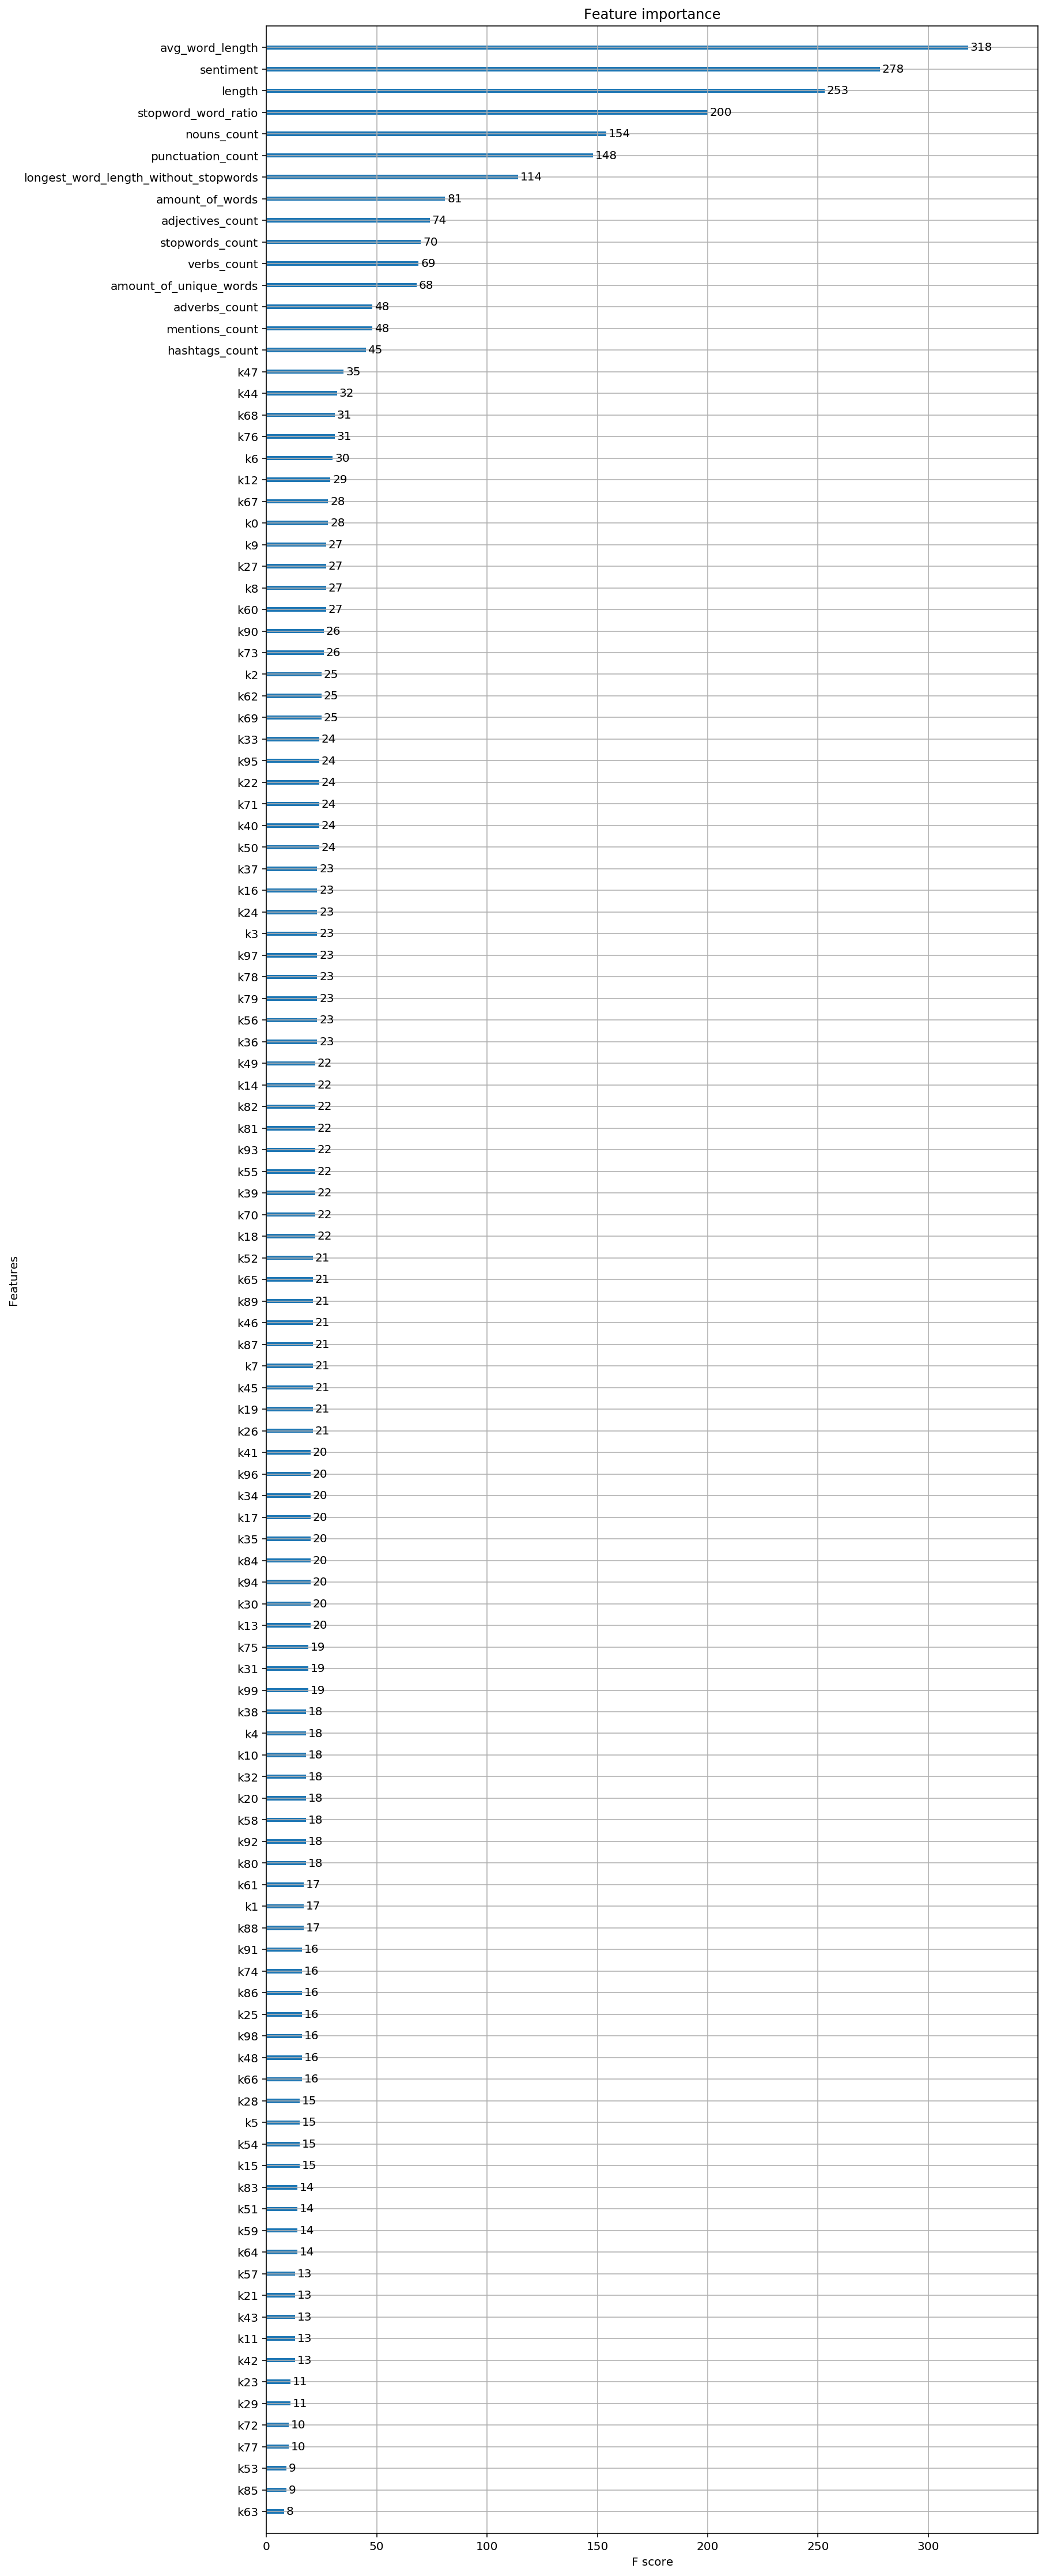

In [70]:
#Feature Importance de features completos
x = train_features_and_kw.loc[:,'length':]
y = train_features_and_kw['target']
model = XGBClassifier()
model.fit(x, y)
pyplot.rcParams['figure.figsize'] = [12, 40]
plot_importance(model)
pyplot.show()

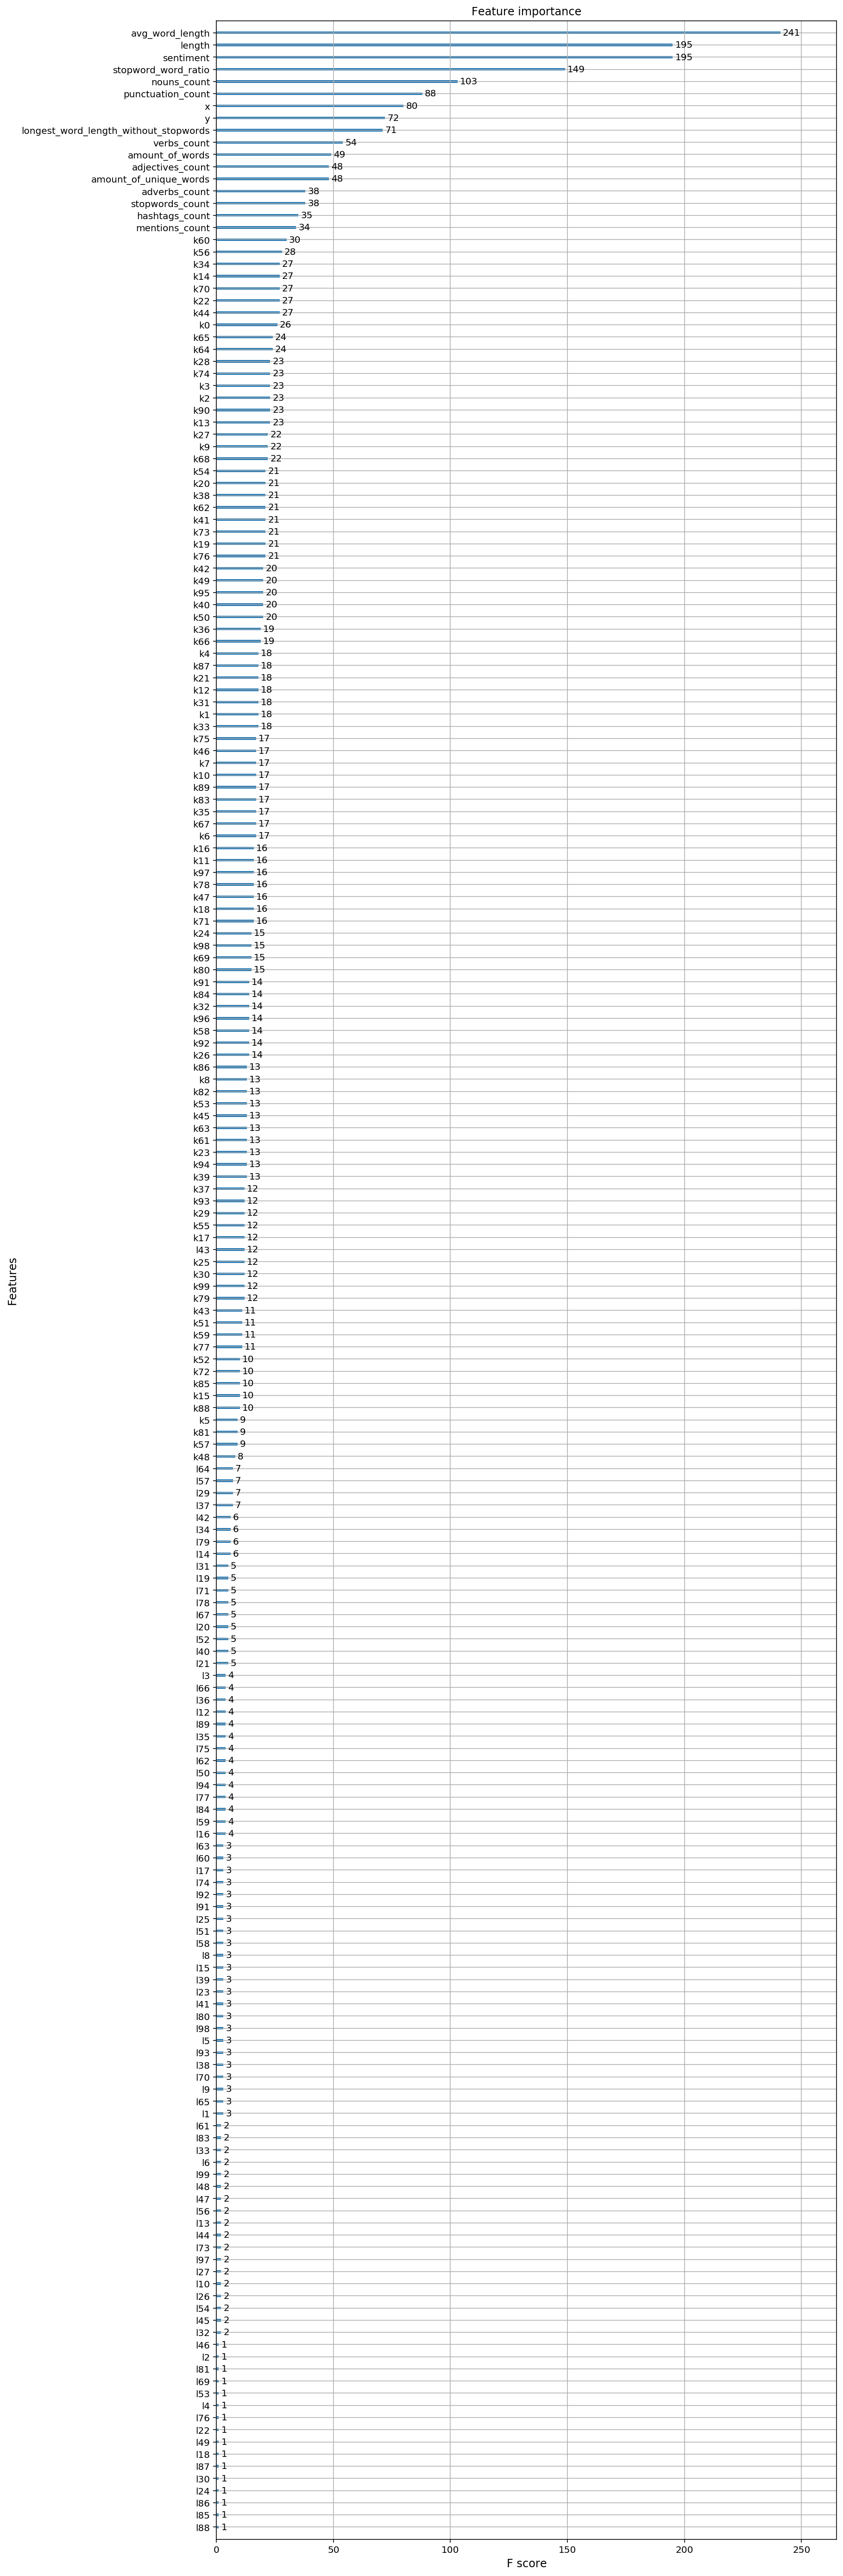

In [93]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
#Feature Importance de todos los features juntos (loc + kw)
x = train_complete.loc[:,'length':]
y = train_complete['target']
model = XGBClassifier()
model.fit(x, y)
pyplot.rcParams['figure.figsize'] = [12, 50]
plot_importance(model)
pyplot.show()

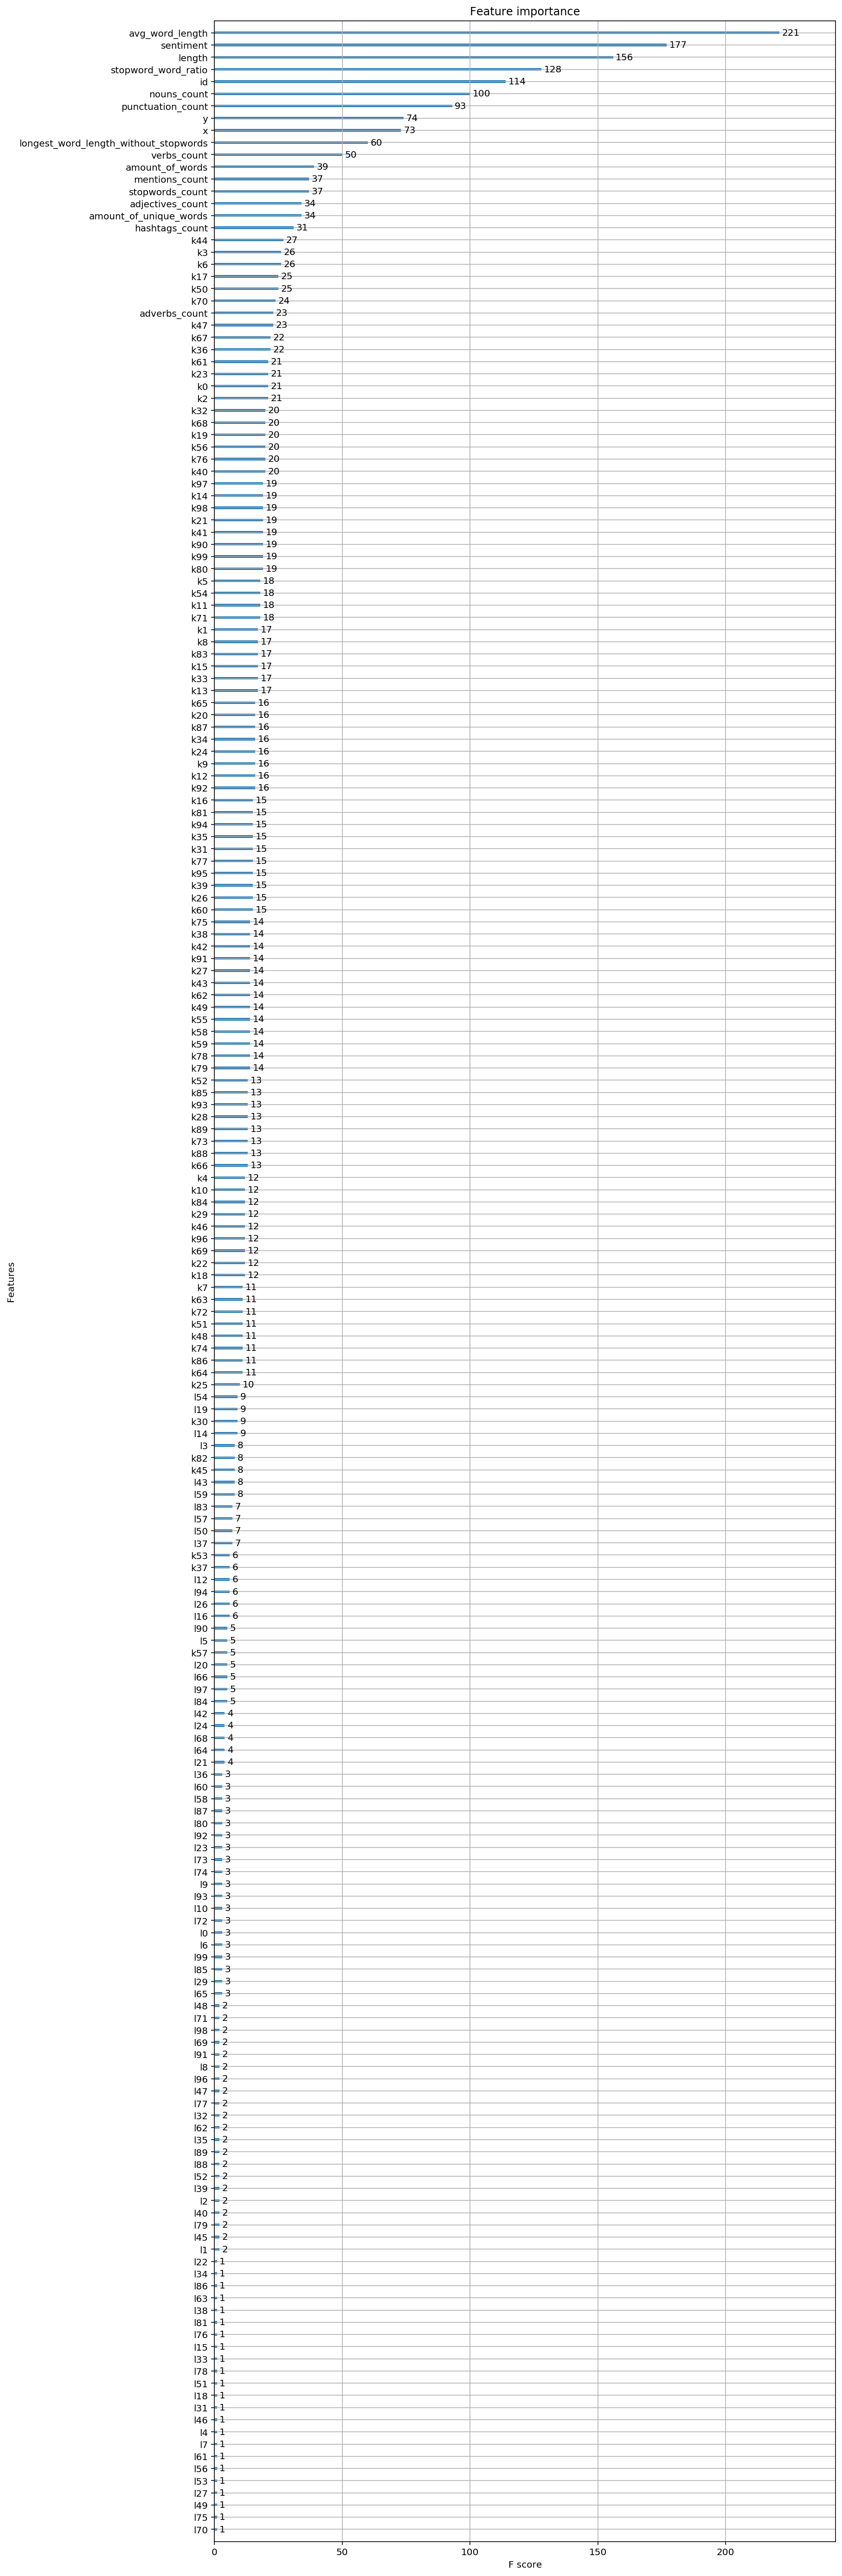

In [5]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
#Feature Importance de todos los features juntos (loc + kw) + ID
x = train_complete.loc[:,'id':]
y = train_complete['target']
model = XGBClassifier()
model.fit(x, y)
pyplot.rcParams['figure.figsize'] = [12, 50]
plot_importance(model)
pyplot.show()

### Evaluación de pre-trained words.

In [13]:
glove_embeddings = np.load('Embeddings/glove.840B.300d.pkl', allow_pickle=True)
fasttext_embeddings = np.load('Embeddings/crawl-300d-2M.pkl', allow_pickle=True)

In [15]:
import operator
def build_vocab(X):
    tweets = X.apply(lambda s: s.split()).values      
    vocab = {}
    for tweet in tweets:
        for word in tweet:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab

def check_embeddings_coverage(X, embeddings):
    vocab = build_vocab(X)    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(tweets_metrics['text'], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(test['text'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

train_fasttext_oov, train_fasttext_vocab_coverage, train_fasttext_text_coverage = check_embeddings_coverage(tweets_metrics['text'], fasttext_embeddings)
test_fasttext_oov, test_fasttext_vocab_coverage, test_fasttext_text_coverage = check_embeddings_coverage(test['text'], fasttext_embeddings)
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_fasttext_vocab_coverage, train_fasttext_text_coverage))
print('FastText Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_fasttext_vocab_coverage, test_fasttext_text_coverage))

GloVe Embeddings cover 52.17% of vocabulary and 82.73% of text in Training Set
GloVe Embeddings cover 57.21% of vocabulary and 81.85% of text in Test Set
FastText Embeddings cover 51.63% of vocabulary and 81.88% of text in Training Set
FastText Embeddings cover 56.55% of vocabulary and 81.12% of text in Test Set


In [33]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.5652974442155101